In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
def classificateWithNumbersThreeTarget(value):
    target=0
    if(value>=0.0015):
        target=1
    elif(value<=-0.0015):
        target=-1
    else:
        target=0
    return target


def split_sequence_modified(sequence, n_steps_in):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        # check if we are beyond the sequence
        if end_ix+5 > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sum(sequence[end_ix:end_ix+5])
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def graph(test_y,yhat,mennyiseg):
    valos=test_y[:mennyiseg]
    predikt=yhat[:mennyiseg]
    valos = pd.DataFrame(valos, columns=['Real'])
    predikt = pd.DataFrame(predikt, columns=['Predicted'])
    merge=valos.join(predikt)
    
    plt.figure(figsize=(30,20))
    sns.lineplot(data=merge, linewidth=3)
    plt.show()

def correlation_heatmap(df):
    import matplotlib.pyplot as plt
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(40,40))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.1, annot=True, cbar_kws={"shrink": .7})
    sns.set(font_scale=2)
    plt.show();
    
    
    
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def metrikak(y_true,y_pred):
    print(mean_squared_error(y_true,y_pred))
    print(mean_absolute_percentage_error(y_true,y_pred))
from numpy import hstack
import array
from numpy import array
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

def percentChange(lastValue,secondLastValue):
        return round((float(lastValue)-secondLastValue)/abs(secondLastValue),6)


def kirajzoltatas(yhat,test_y):
    yhat = pd.DataFrame(yhat, columns=['Predicted'])
    test_y2 = pd.DataFrame(test_y, columns=['Real'])
    merge=test_y2.join(yhat)

    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(30,20))
    sns.lineplot(data=merge[:100], linewidth=3)
    plt.show()

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)



tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
    
#data1 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_06', sep=",", header=None)
#data1.columns = ["time", "open", "high", "low","close","volume",'drop1','drop2']

#data2 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_07', sep=",", header=None)
#data2.columns = ["time", "open", "high", "low","close","volume",'drop1','drop2']

#data3 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_08', sep=",", header=None)
#data3.columns = ["time", "open", "high", "low","close","volume",'drop1','drop2']

data4 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_09', sep=",", header=None)
data4.columns = ["time", "open", "high", "low","close","volume"]

#data= pd.concat([data1,data2,data3,data4], axis=0)
#data=data4.dropna()
data=data4[['time','open','high','low','close','volume']]
data=data.dropna()
#data

#data=data4

Setup Complete


2021-11-11 12:33:30.499564: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-11 12:33:30.499623: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
%%time
#btc_data = pd.read_csv(r"/home/balazs/Desktop/szakdoga_info/btc_data.csv")
#data = btc_data.dropna()
data['MA5']=data['open'].rolling(window =5).mean()
data['EMA5']=data['open'].ewm(span=5,min_periods=0,adjust=False,ignore_na=False).mean()
data['CMA']=data.open.expanding().mean()
data['open_percentage_change']=data.open.pct_change()
data['close_percentage_change']=data.close.pct_change()
data['high_percentage_change']=data.high.pct_change()
data['low_percentage_change']=data.low.pct_change()
data['volume_percentage_change']=data.volume.pct_change()
lista=[]
for i in range(len(data.open_percentage_change.values)-5):
        value=data.open_percentage_change.values[i+1]+data.open_percentage_change.values[i+2]+data.open_percentage_change.values[i+3]+data.open_percentage_change.values[i+4]+data.open_percentage_change.values[i+5]
        lista.append(value)
for i in range(5):
    lista.append(0)
data['profit']=lista
buy_sell_list=[classificateWithNumbersThreeTarget(elem) for elem in data.profit]
data['decision']=buy_sell_list
data=data.dropna()
data.drop(data.tail(5).index,inplace=True) # drop last n rows
X=data[['close_percentage_change','high_percentage_change','low_percentage_change']]
y=data[['decision']]
from imblearn.over_sampling import SMOTE

from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X, y = smt.fit_resample(X, y)

CPU times: user 12.6 s, sys: 43.4 ms, total: 12.6 s
Wall time: 12.7 s


In [3]:
x_train, x_test, y_train, y_test = train_test_split(
X[['close_percentage_change','high_percentage_change','low_percentage_change']],
y['decision'],
test_size = 0.3
)

In [7]:
len(x_train)

1844662

In [8]:
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [9]:
regr_1.score(x_test, y_test)

0.09111941362828058

In [10]:
yhat=regr_1.predict(x_test)

In [11]:
yhat

array([ 0.10668118, -0.00941369, -0.00941369, ..., -0.00941369,
       -0.00941369, -0.00941369])

In [12]:
y_test

2096931    1
702922    -1
2435835    1
378617     0
2429289    1
          ..
619394     0
1457660   -1
403046     1
569355    -1
406074     0
Name: decision, Length: 790570, dtype: int64

In [13]:
metrikak(y_test,yhat)

0.6161089641956292
inf


In [8]:
def my_round(szam,erzekenyseg):
    if(szam<0 and szam<-(erzekenyseg)):
        return -1
    elif(szam>0 and szam>erzekenyseg):
        return 1
    else:
        return 0
            

In [15]:
joslat=[my_round(elem,0.5) for elem in yhat]

In [16]:
from sklearn.metrics import classification_report
classes = ['-1','0','1']
print(classification_report(y_test, joslat, target_names = classes, zero_division = 0))

              precision    recall  f1-score   support

          -1       0.80      0.09      0.16    267505
           0       0.35      0.97      0.51    254660
           1       0.77      0.14      0.24    268405

    accuracy                           0.39    790570
   macro avg       0.64      0.40      0.30    790570
weighted avg       0.65      0.39      0.30    790570



# XGB

In [157]:
temp_X=X[:50000]
temp_y=y[:50000]

In [158]:
x_train, x_test, y_train, y_test = train_test_split(
temp_X[['close_percentage_change','high_percentage_change','low_percentage_change']],
temp_y['decision'],
test_size = 0.3
)

In [177]:

import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 100, seed = 123,learning_rate=0.07,
                        max_depth=7,col_sample_bytre=0.7)
  
# Fitting the model
xgb_r.fit(x_train, y_train)
  
# Predict the model
pred = xgb_r.predict(x_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

[13:27:00] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:00] WARNING: ../src/learner.cc:573: 
Parameters: { "col_sample_bytre" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


RMSE :  0.623161


In [122]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [123]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(x_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


KeyboardInterrupt: 

In [73]:
y_test

1447507    0
974698     1
3137261    1
2469677   -1
373748     0
          ..
3120017    1
1505135    0
3232523    1
1072926    0
3213829    1
Name: decision, Length: 1048831, dtype: int64

In [160]:
def graph(test_y,yhat,mennyiseg):
    valos=test_y[:mennyiseg].values
    predikt=yhat[:mennyiseg]
    valos = pd.DataFrame(valos, columns=['Real'])
    predikt = pd.DataFrame(predikt, columns=['Predicted'])
    merge=valos.join(predikt)
    
    plt.figure(figsize=(30,20))
    sns.lineplot(data=merge, linewidth=3)
    plt.show()

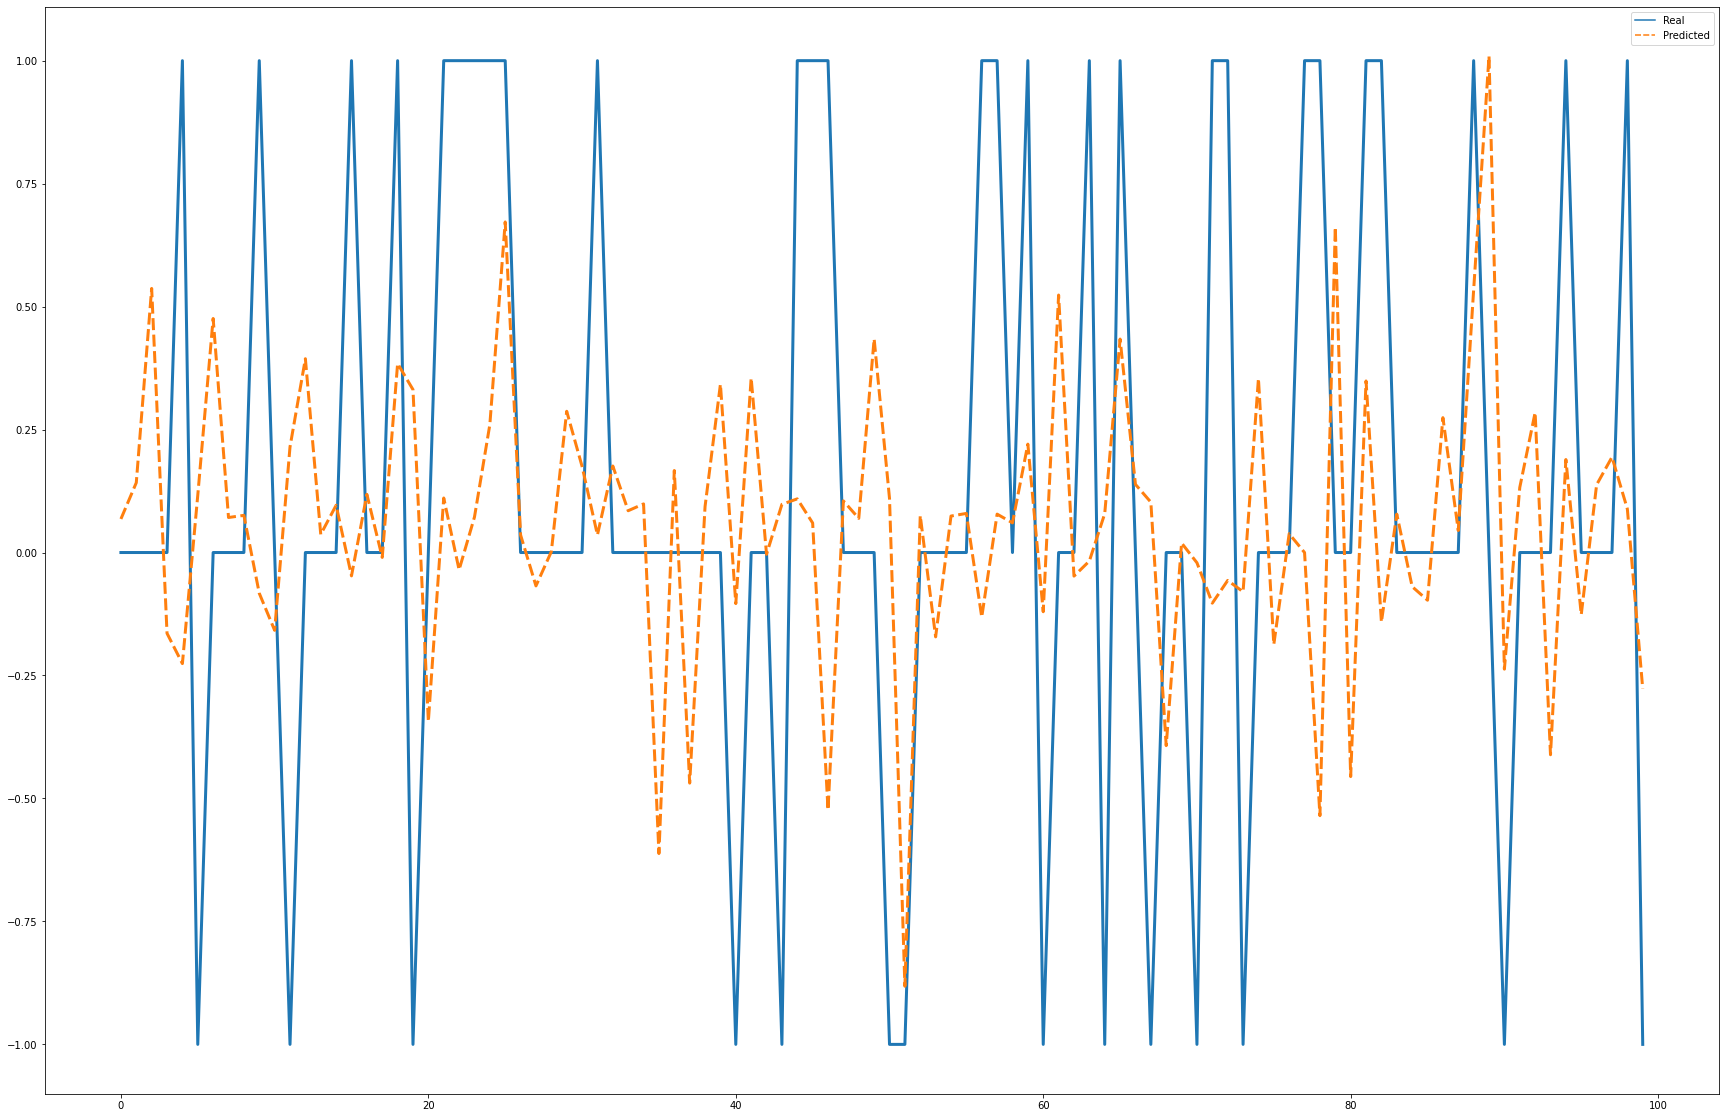

In [161]:
graph(y_test,pred,100)

In [170]:
joslat=[my_round(elem,0.1) for elem in pred]

In [171]:
from sklearn.metrics import classification_report
classes = ['-1','0','1']
print(classification_report(y_test, joslat, target_names = classes, zero_division = 0))

              precision    recall  f1-score   support

          -1       0.29      0.40      0.33      2907
           0       0.63      0.38      0.48      8666
           1       0.30      0.49      0.37      3427

    accuracy                           0.41     15000
   macro avg       0.40      0.42      0.39     15000
weighted avg       0.49      0.41      0.42     15000



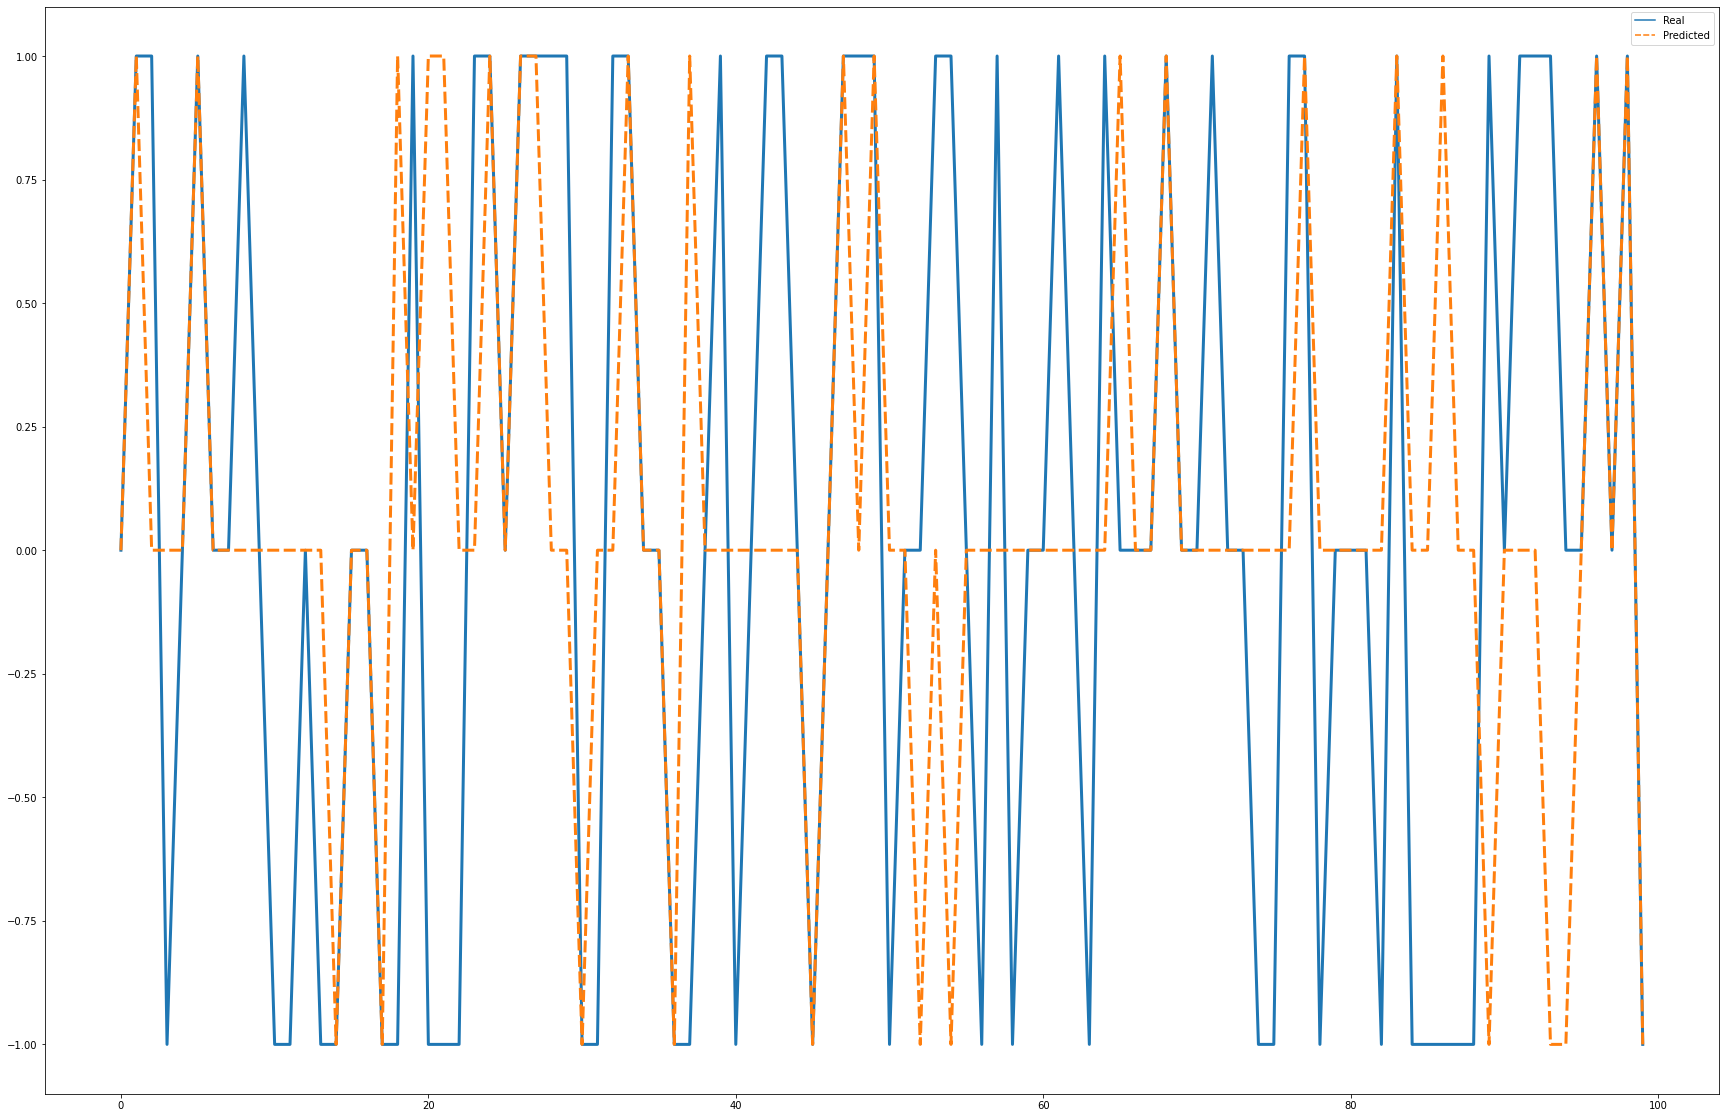

In [101]:
graph(y_test,joslat,100)

# Logistic Regression

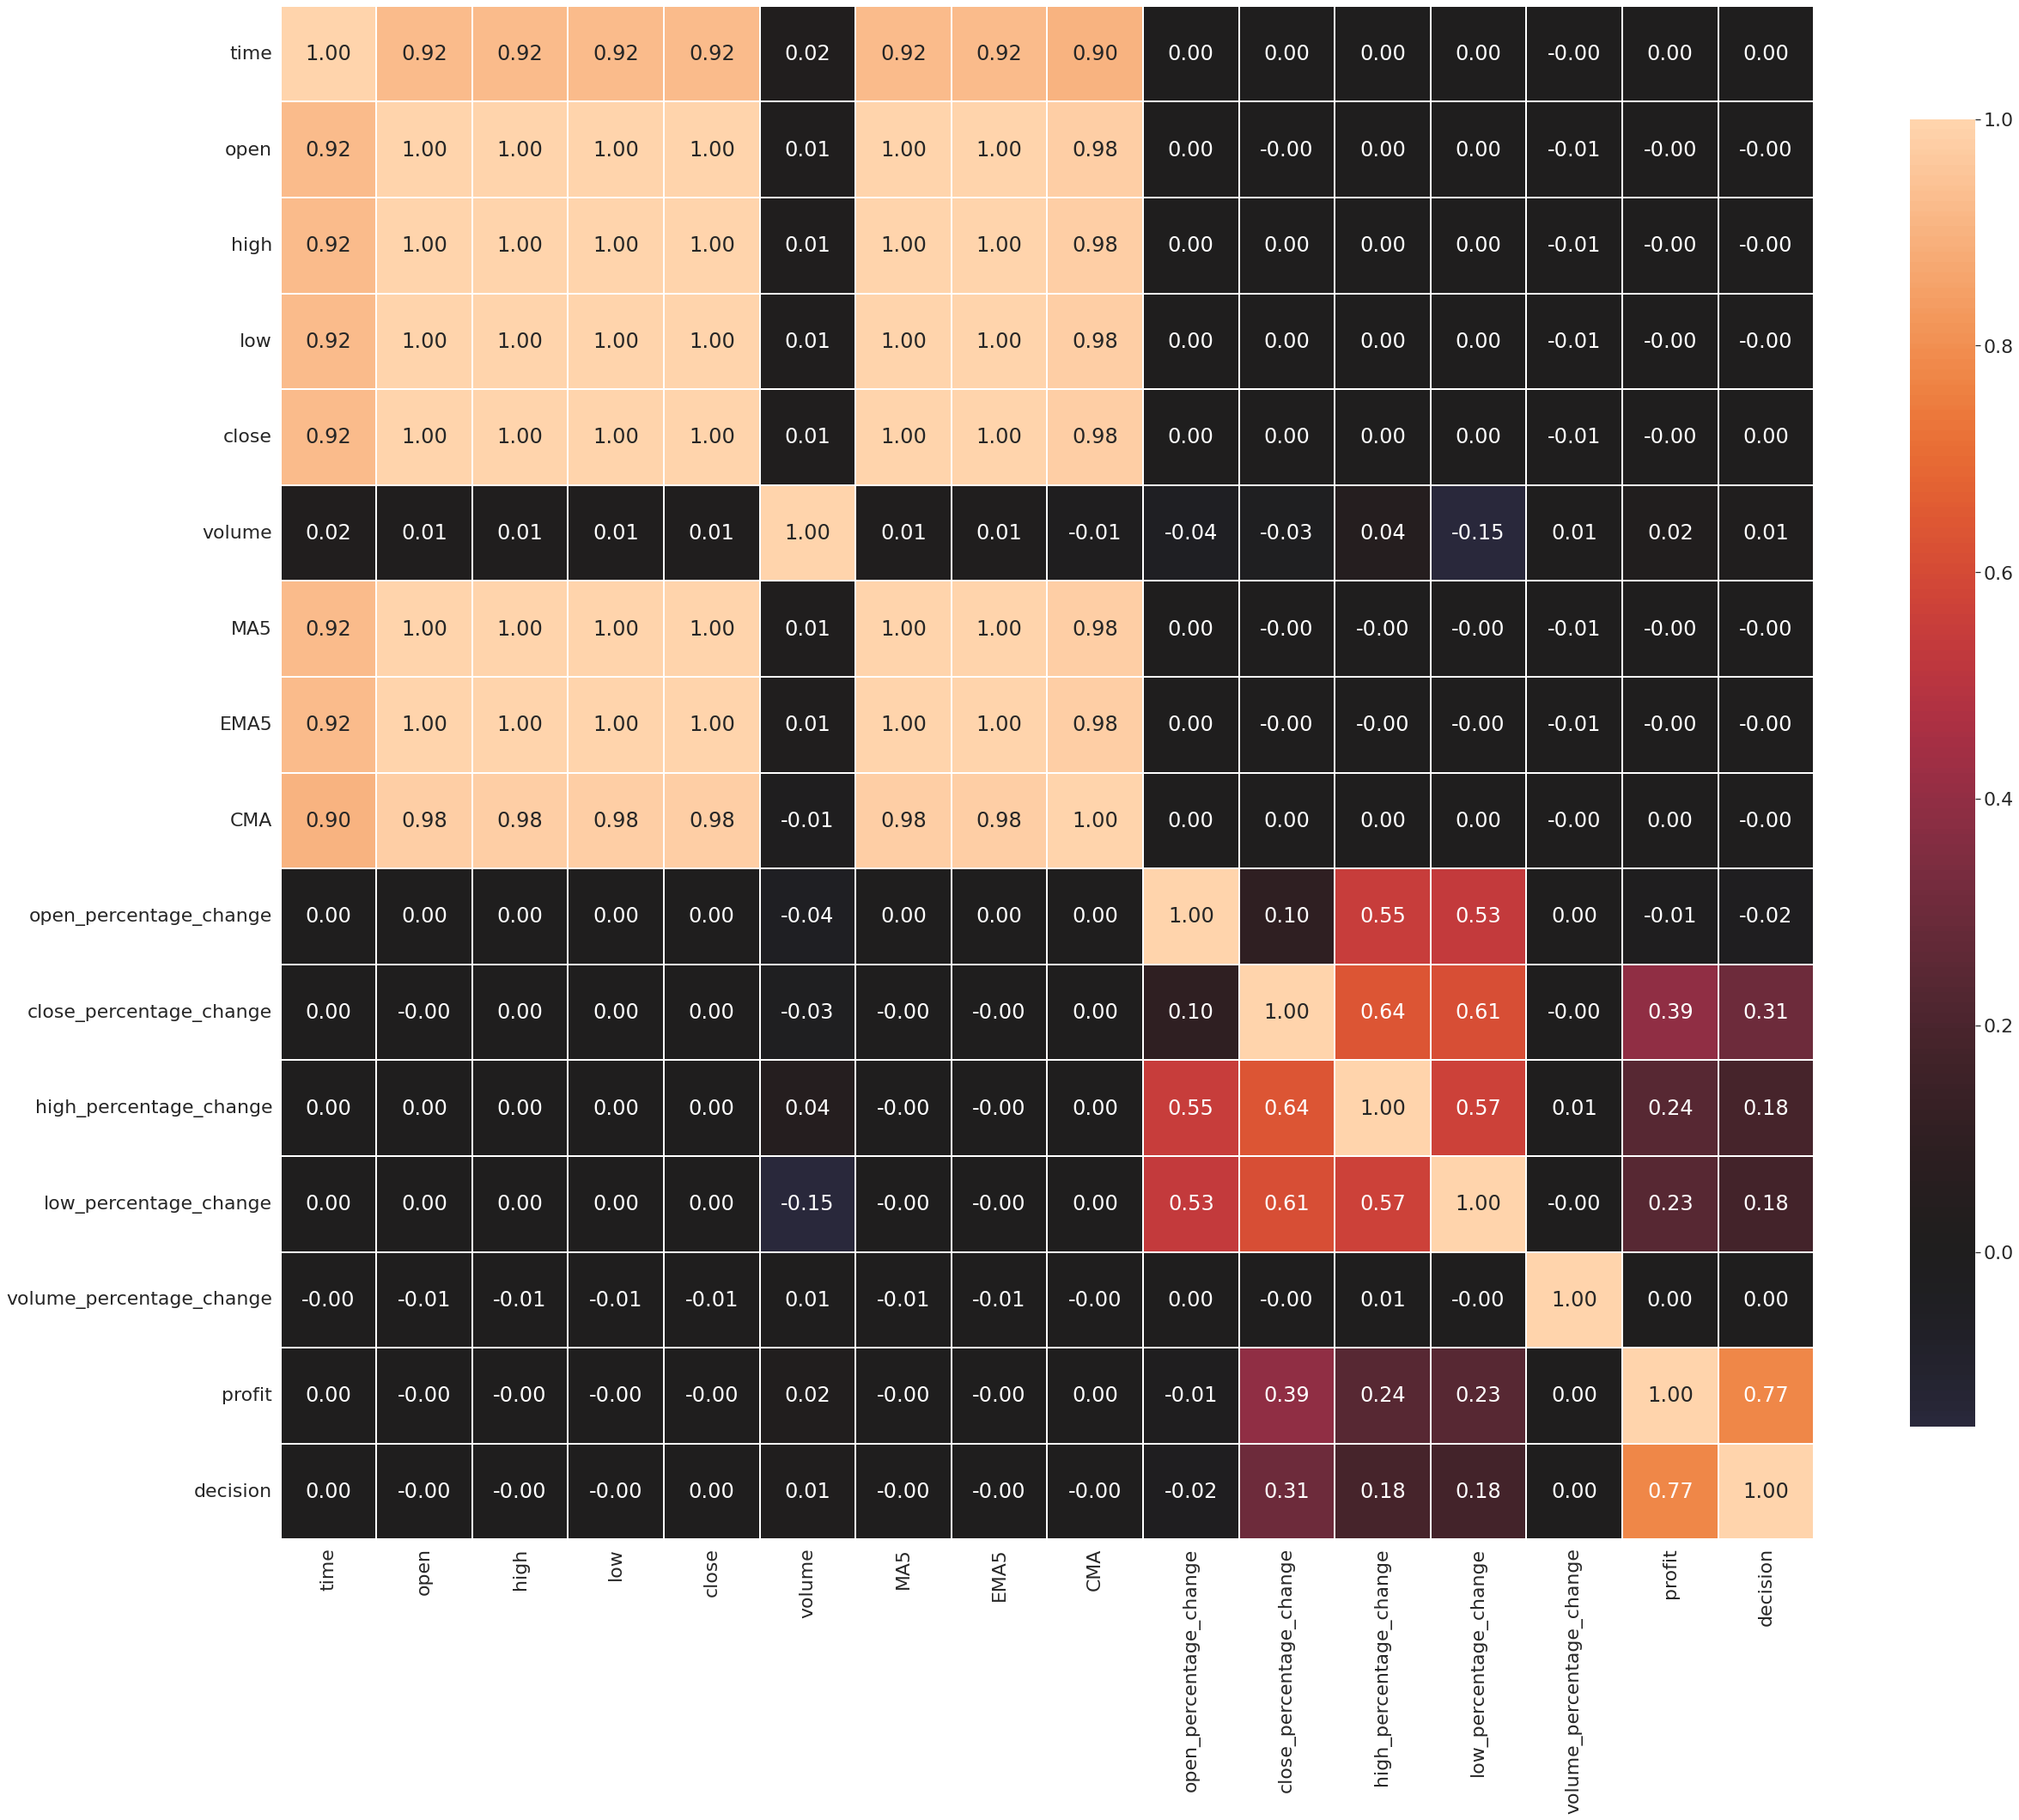

In [201]:
correlation_heatmap(data)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
X[['close_percentage_change','high_percentage_change','low_percentage_change']],
y['decision'],
test_size = 0.3
)

In [18]:
y_train

119429     1
1038777    0
2274046    1
2093705    1
2463387    1
          ..
2442583    1
247688     1
1521442   -1
2112684    1
2517584    1
Name: decision, Length: 1844662, dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)

In [196]:
x_test

,close_percentage_change,high_percentage_change,low_percentage_change
12685,-0.000050,-0.000233,-0.000002
31989,0.000824,0.000846,0.000000
36258,0.000000,0.000000,-0.000838
213,0.000675,-0.001175,-0.001844
3996,-0.000003,-0.000948,0.000000
...,...,...,...
26497,0.002209,0.002209,0.001519
48723,0.002416,0.002428,0.001972
31865,0.000052,0.001238,0.000049
18689,-0.000232,-0.000343,0.000012


In [20]:
preds=clf.predict(x_test)

In [21]:
from sklearn.metrics import classification_report
classes = ['-1','0','1']
print(classification_report(y_test, preds, target_names = classes, zero_division = 0))

              precision    recall  f1-score   support

          -1       0.46      0.64      0.53    267627
           0       0.46      0.06      0.11    255183
           1       0.46      0.65      0.54    267760

    accuracy                           0.46    790570
   macro avg       0.46      0.45      0.39    790570
weighted avg       0.46      0.46      0.40    790570



In [26]:
y_test.values

array([ 1, -1,  0, ...,  0, -1,  1])

In [7]:
from sklearn import neighbors
n_neighbors=1000
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform',leaf_size=30)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=1000)

In [ ]:
preds=knn.predict(x_test)
metrikak(y_test,preds)

In [ ]:
graph(y_test.values,preds,100)

In [ ]:
y_test

In [ ]:
joslat=[my_round(elem,0.19) for elem in preds]
from sklearn.metrics import classification_report
classes = ['-1','0','1']
print(classification_report(y_test, joslat, target_names = classes, zero_division = 0))

# KNN

In [4]:
from sklearn import neighbors
n_neighbors=350
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform',leaf_size=30)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=350)

In [9]:
preds=knn.predict(x_test)
joslat=[my_round(elem,0.2) for elem in preds]
from sklearn.metrics import classification_report
classes = ['-1','0','1']
print(classification_report(y_test, joslat, target_names = classes, zero_division = 0))


              precision    recall  f1-score   support

          -1       0.59      0.47      0.53     62307
           0       0.43      0.63      0.51     59613
           1       0.61      0.46      0.53     62283

    accuracy                           0.52    184203
   macro avg       0.54      0.52      0.52    184203
weighted avg       0.55      0.52      0.52    184203



In [17]:
import joblib
joblib.dump(knn,'knnRegression.joblib')

['knnRegression.joblib']

# Bayesian

In [39]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(x_train,y_train)

BayesianRidge()

In [47]:
preds=reg.predict(x_test)
metrikak(y_test,preds)
joslat=[my_round(elem,0.12) for elem in preds]
from sklearn.metrics import classification_report
classes = ['-1','0','1']
print(classification_report(y_test, joslat, target_names = classes, zero_division = 0))

0.5739149418626404
inf
              precision    recall  f1-score   support

          -1       0.60      0.41      0.49     62345
           0       0.45      0.64      0.53     67584
           1       0.57      0.50      0.53     67411

    accuracy                           0.52    197340
   macro avg       0.54      0.52      0.52    197340
weighted avg       0.54      0.52      0.52    197340



In [49]:
import joblib
joblib.dump(reg,'bayesianRegression.joblib')

['bayesianRegression.joblib']